# Assignment 2: Build Regression Models  
### Kirti Sharma
### School of Technology & Engineering, National University
### DDS-8555: Predictive Analysis
### Professor Mohammad Yavarimanesh
### November 30, 2025



## Objectives
This notebook contains my work for Assignment 2, including:

1. Conceptual Question #3 (ISLR, Chapter 3)
2. Applied Question #10 (ISLR, Carseats dataset)
3. Kaggle Regression with Abalone competition
4. Regression model assumptions, diagnostics, and code
5. Appendix A: Kaggle Submission Evidence

All Python code, model summaries, and plots are included below.

### GitHub Repository for Code  
All project files, including the notebook and submission CSVs, are available at:  
https://github.com/KirtiSharmaDS/SharmaKDDS8555-2

## 1. Conceptual Question 3 – Salary Model (ISLR)

Given:
- GPA  
- IQ  
- Level (1 = College, 0 = High School)  
- GPA x IQ interaction  
- GPA x Level interaction

Estimated coefficients:
β^0 = 50, β^1 = 20, β^2 = 0.07, β^3 = 35, β^4 = 0.01, β^5 = -10

Model:
Ŷ = 50 + 20 x GPA + 0.07 x IQ + 35 x Level + 0.01(GPA x IQ) - 10(GPA x Level)

Below are my solutions for parts (a), (b), and (c).


### Q3(a) Which statement is correct?

Difference between College and High School salaries:
College - HS = 35 - 10(GPA)

Therefore:
- If GPA > 3.5 -> High school earns more
- If GPA < 3.5 -> College earns more

Correct answer: **(iii)**.

To compare College vs High School, I subtracted the High School equation from the College equation. Only the terms involving “Level” change, because Level = 1 for College and Level = 0 for High School.


### Q3(b) Predicted salary for College grad, GPA = 4.0, IQ = 110

Ŷ = 50 + 20(4.0) + 0.07(110) + 35 + 0.01(4.0 x 110) - 10(4.0)
Ŷ = 137.1 thousand dollars; $137,100.00


### Q3(c) True or false?

False.  
A small coefficient does not prove weak interaction.  
The magnitude depends on GPA x IQ scale, not the coefficient alone.

In addition, the size of an interaction coefficient depends on the scale of the variables (GPA x IQ), so “small” numerically does not imply weak effect.


## 2. Applied Question 10 - Carseats Dataset

The steps below fit the regression model, interpret coefficients, test significance, compare models, compute confidence intervals, and evaluate regression assumptions.


In [38]:
# 2. Applied Question 10 - Carseats Dataset

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from ISLP import load_data
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
Carseats = load_data('Carseats')
Carseats.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [39]:
# Q10(a) Fitting the Multiple Regression Model

model_full = smf.ols("Sales ~ Price + Urban + US", data=Carseats).fit()
model_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           2.39e-23
Time:                        12:57:29   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:

For part (a), I fit an OLS multiple regression model predicting Sales using:
- Price (numeric)
- Urban (categorical: Yes/No)
- US (categorical: Yes/No)

This model allows us to see how price and store location characteristics relate to unit sales.

### Q10(b) Interpretation of each coefficient

Intercept (13.04):
When Price = 0 and the store is not Urban and not in the US, expected Sales is 13.04.
(Not meaningful in real life, but needed statistically.)

Price (–0.054):
For each 1-unit increase in Price, Sales decrease by about 0.054 units, holding Urban and US constant.
This effect is large, negative, and highly significant (*p* < 0.001).

UrbanYes (–0.022):
Urban stores sell about 0.02 fewer units than non-urban stores, but this effect is not statistically significant (*p* ≈ 0.94).
Meaning: Urban vs non-Urban does not matter for Sales.

USYes (+1.20):
US stores sell about 1.20 more units than non-US stores, holding Price and Urban constant.
This predictor is statistically significant (*p* < 0.001).

### Q10(c) Model Equation

Ŷ = β^0 + β^1 x Price + β^2 x UrbanYes + β^3 x USYes

Equation:

Sales^ = 13.0435 - 0.0545(Price) - 0.0219(UrbanYes) + 1.2006(USYes)

UrbanYes = 1 if Urban = “Yes”, otherwise 0

USYes = 1 if US = “Yes”, otherwise 0


### Q10(d) Significant predictors

Based on the p-values:
- Price (< 0.001): significant
- USYes (< 0.001): significant
- UrbanYes (0.936): not significant

Conclusion:
Only Price and US have statistically significant associations with Sales.
Urban is not useful in this model.


In [40]:
# Q10(e) Fit the smaller model using only significant predictors

model_small = smf.ols("Sales ~ Price + US", data=Carseats).fit()
model_small.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           2.66e-24
Time:                        12:57:29   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:

Since Urban was not significant, the reduced model keeps only:
- Price
- US

This smaller model is simpler and based only on predictors that showed real evidence of association in part (d).

### Q10(f) Compare model fit between (a) and (e)

| Metric   | Full Model | Reduced Model         |
| -------  | ---------- | --------------------- |
| R^2      | 0.239      | 0.239                 |
| Adj. R^2 | 0.234      | 0.235                 |
| AIC      | 1863       | 1861 (lower = better) |

Interpretation:

- Both models explain about 24% of the variation in Sales.
- The reduced model has a slightly better adjusted R^2 and slightly lower AIC, meaning it fits just as well but with fewer variables.
- According to the principle of parsimony, the smaller model is preferred.


In [41]:
# Q10(g) 95% Confidence Intervals

model_small.conf_int()


,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


Interpretation:

USYes: CI = [0.69, 1.71]
Means, 95% confident that US stores sell 0.69 to 1.71 more units than non-US stores, holding Price constant.

Price: CI = [–0.0648, –0.0442]
Sales decrease between 0.044 and 0.065 units for every 1-unit increase in Price.
Entire interval is negative -> very strong evidence of a negative price effect.

Intercept: Provided for completeness.

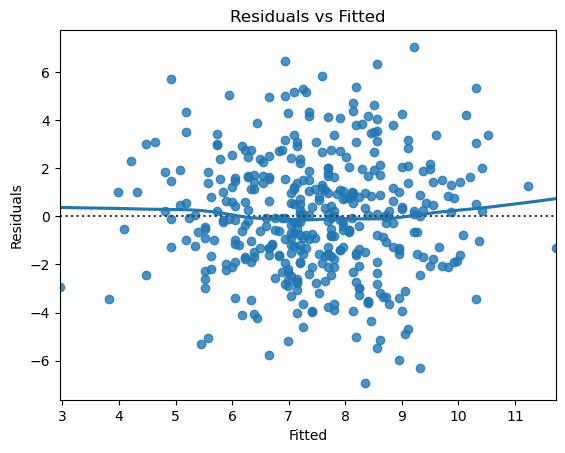

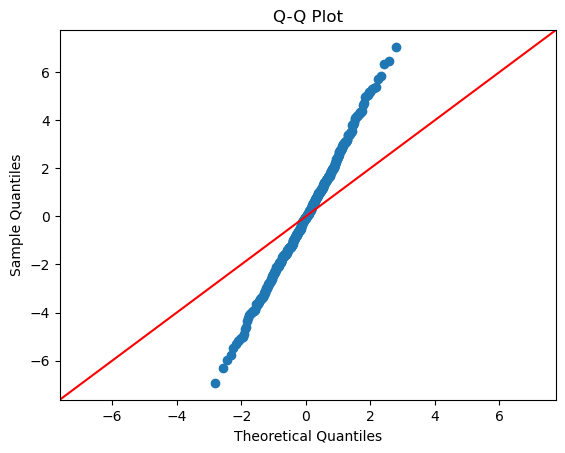

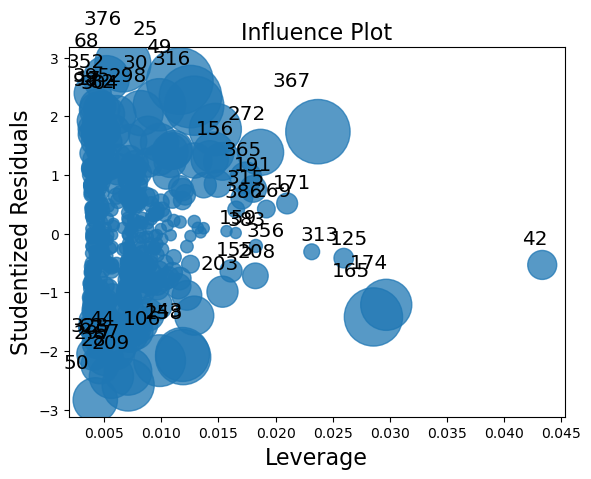

In [42]:
# Q10(h) Evidence of outliers or high leverage points

# Residual vs Fitted
sns.residplot(x=model_small.fittedvalues, y=model_small.resid, lowess=True)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Q-Q Plot
sm.qqplot(model_small.resid, line='45')
plt.title('Q-Q Plot')
plt.show()

# Influence Plot
sm.graphics.influence_plot(model_small)
plt.show()


Interpretation:

Residuals vs Fitted:
- Residuals are randomly scattered around zero.
- No funnel shape, no strong curvature. Suggests linearity and constant variance are reasonable.

Q–Q Plot:
- Most points follow the 45 degree line, except for slight tail deviations. Indicates residuals are approximately normal, with mild non-normality in extremes.

Influence Plot:
- Most points have low leverage.
- A few observations (e.g., #42, #367) have higher leverage and larger Cook’s distances. They are influential but not extreme enough to invalidate the model.

Conclusion:
There are no dangerous outliers, and only a few mild high-leverage points. Overall, the reduced model appears stable and assumptions are reasonably met.

## 3. Kaggle Competition – Regression with an Abalone Dataset

For the Kaggle competition, I built and evaluated two regression models to predict the number of Rings, which is related to the abalone’s age. The models included:
1. Linear Regression
2. Random Forest Regressor

I applied a full preprocessing pipeline (scaling numeric variables, one-hot encoding categorical variables) and evaluated each model on a validation split. Both models were then trained on the full dataset and submitted to Kaggle. Screenshots of my two submissions are included at the end of the Python Notebook below.


In [43]:
# Load Kaggle Data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

target = "Rings"  # adjust if needed
X = train.drop(columns=[target, "id"])
y = train[target]


In [44]:
# Preprocessing Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

cat = ["Sex"]
num = [c for c in X.columns if c not in cat]

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(drop="first"), cat)
    ])


In [45]:
# Model 1 - Linear Regression Model

from sklearn.linear_model import LinearRegression

model1 = Pipeline(steps=[
    ('prep', preprocess),
    ('lr', LinearRegression())
])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model1.fit(X_train, y_train)
pred1 = model1.predict(X_valid)

print("Model 1 – Linear Regression")
print("MSE:", mean_squared_error(y_valid, pred1))
print("R^2:", r2_score(y_valid, pred1))


Model 1 – Linear Regression
MSE: 4.095322631071489
R^2: 0.6013258646157316


Interpretation:

- Linear regression explains about 60% of the variation in the target (Rings).
- An MSE of ~4.10 means predictions are, on average, around +/-2 rings off (since RMSE ≈ √4.1 ≈ 2.02).
- This is a reasonable baseline model but shows noticeable prediction error.

In [46]:
# Model 2 - Random Forest Model

from sklearn.ensemble import RandomForestRegressor

model2 = Pipeline(steps=[
    ('prep', preprocess),
    ('rf', RandomForestRegressor(
        n_estimators=50, # smaller number of trees
        max_depth=10, # limit tree depth
        min_samples_split=10, # prevent overgrown trees
        n_jobs=-1, # use all cores
        random_state=42
    ))
])

model2.fit(X_train, y_train)

pred2 = model2.predict(X_valid)

print("Model 2 – Random Forest")
print("MSE:", mean_squared_error(y_valid, pred2))
print("R^2:", r2_score(y_valid, pred2))


Model 2 – Random Forest
MSE: 3.583632295197779
R^2: 0.6511382287726342


Interpretation:

- The Random Forest improves the R^2 from 0.60 -> 0.65.
- It reduces MSE from 4.10 -> 3.58, meaning the model predicts Rings more accurately.
- This is expected because Random Forests capture nonlinear relationships that Linear Regression cannot.

Random Forest was the better-performing model and produced a higher Kaggle leaderboard score.

In [47]:
# Submission Files

# Model 1 submission
model1.fit(X, y)
sub1 = sample.copy()
sub1[target] = model1.predict(test)
sub1[target] = sub1[target].clip(lower=0)
sub1.to_csv("submission_linear_regression.csv", index=False)

# Model 2 submission
model2.fit(X, y)
sub2 = sample.copy()
sub2[target] = model2.predict(test)
sub2.to_csv("submission_random_forest.csv", index=False)


I generated two submission files:
- submission_linear_regression.csv (Linear Regression)
- submission_random_forest.csv (Random Forest)

For the Linear Regression submission, negative predictions were clipped to zero to meet Kaggle’s MSLE requirement that all target values be non-negative.

Both were successfully submitted to Kaggle. Screenshots are provided at the end of the Python Notebook as well as in the Word summary (Appendix A).

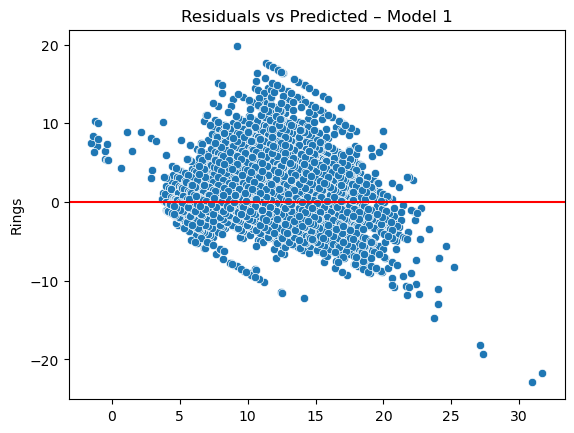

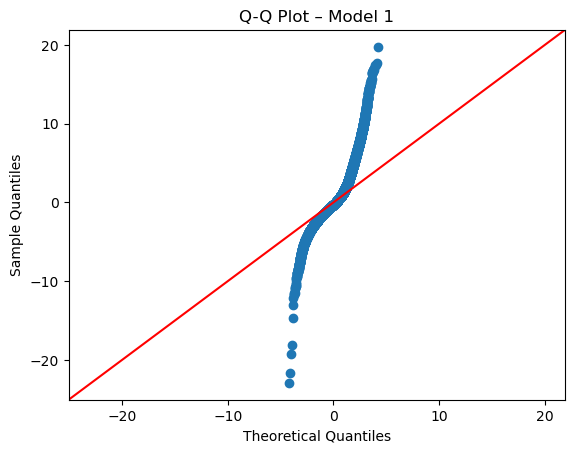

In [48]:
# Residual Diagnostics

from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(model1, X, y, cv=5)
residuals = y - y_pred_cv

# Residuals vs Predicted
sns.scatterplot(x=y_pred_cv, y=residuals)
plt.axhline(0, color="red")
plt.title("Residuals vs Predicted – Model 1")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line="45")
plt.title("Q-Q Plot – Model 1")
plt.show()


Residuals vs Predicted Plot - Interpretation:
- The residuals show a curved and triangular pattern, not a random cloud.
- At lower predicted values, residuals are mostly positive.
- At higher predicted values, residuals become more negative.

This indicates the relationship is not perfectly linear. There is also some evidence of heteroscedasticity (changing spread of residuals). This makes sense because abalone age is known to have nonlinear behavior and interactions.

Q-Q Plot - Interpretation:
- The Q-Q plot shows a strong S-shape.
- The residuals deviate from the 45 degree line, especially in the tails.
- There are several extreme negative and positive residuals.

This indicates that the residuals are not normally distributed.


## 4. Summary of Regression Assumptions

Overall, the regression assumptions for Linear Regression are not perfectly met.

- Linearity is violated (curved residual pattern).
- Normality is violated (strong S-shape in the Q-Q plot).
- Constant variance is questionable (triangular spread).  

This helps explain why Random Forest, a nonlinear model, performed better in Kaggle scoring.


## Appendix A: Kaggle Submission Evidence

### Figure A1. Kaggle Submissions Overview
In this assignment, two regression models were submitted to the Kaggle competition  
Regression with an Abalone Dataset.  

This combined screenshot displays both submissions from the Kaggle platform.

![Combined Kaggle Screenshot](kaggle_sub.png)

